In [4]:
from division_y_preproceso import division_y_preproceso
from funciones_modelos import *
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [5]:
X_train,X_test,y_train,y_test,preproceso = division_y_preproceso("df_final2.csv")

In [6]:
#Random Forest
rf = RandomForestRegressor(n_jobs=-1,random_state=123)
pipeline_rf = Pipeline(steps=[
    ("preprocessing", preproceso),
    ("modelo", rf)
])
#ENTRENAMIENTO e hiperparametros
param_distributions = {
    "modelo__n_estimators": range(150, 500, 20),
    "modelo__max_depth": range(1, 25, 2),
    "modelo__min_samples_split": range(4, 40, 2),
    "modelo__min_samples_leaf": range(2, 20, 2),
    "modelo__max_features": ["log2", "sqrt", 0.5, 0.6],
    "modelo__criterion": ["squared_error", "absolute_error", "friedman_mse"],
    "modelo__max_leaf_nodes": [None, 50, 100, 200, 500],
}
grid_rf = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    scoring="neg_mean_absolute_error",
    random_state=123,
)

modelo_rf = grid_rf.fit(X_train, y_train)



C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\impute\_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


In [7]:
df_metricas=metricas(modelo_rf,X_test,y_test)
df_metricas

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Modelo
mae,824081.874
rmse,1479506.687
media,1912018.916
mae/media,0.431
r2,0.701
r2_ajustado,0.691


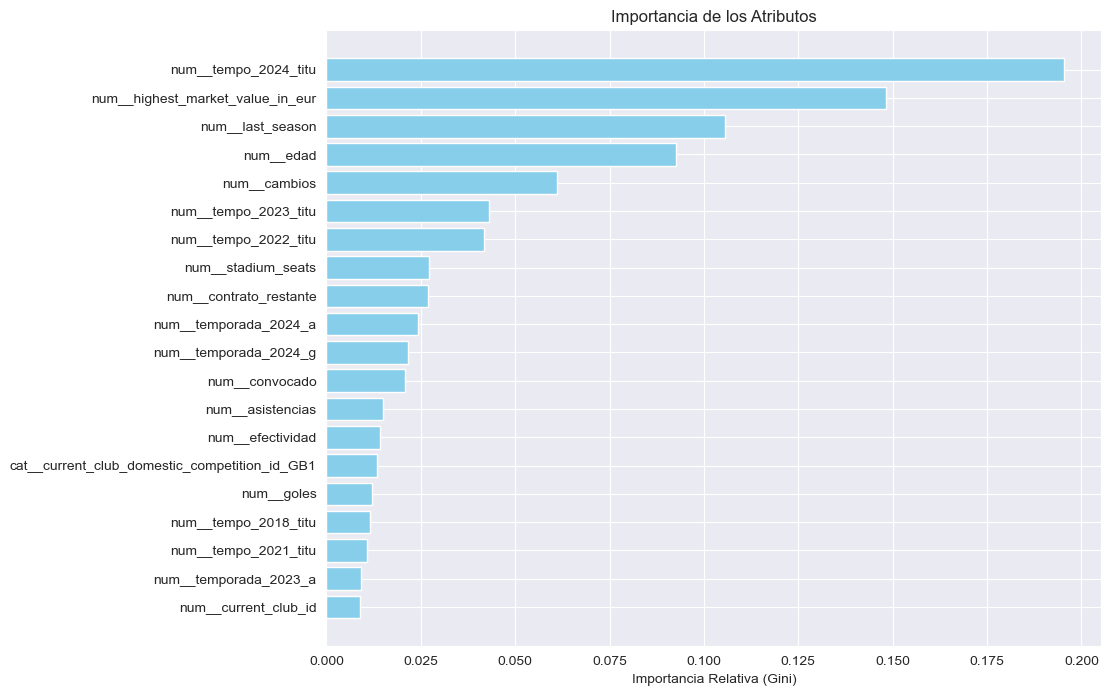

In [8]:
importancia_atributos(modelo_rf,20)

In [9]:
guardar_modelo(modelo_rf,"RF")